# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

a.) A model is linear in that the data points are plotted on a 2D plane. In turn, this means that a model is linear in that its prediction is based off that 2D plane, even if it includes more than two variables.

b.) The coefficent for a one-hot encoded variable is related to the magnitude and direction of the categorical variables impact on the regression model. If a categorical variable has a high positive value, then this means that a record with a true value for that categorical variable is associated with a higher target value.

c.) Yes, linear regression can be used for classification through the use of dummy variables. However, this can lead to conclusions that have severe interpretability issues. This can be due to uneven counts of classes, heteroskedasticity, and other potential problems with converting categorical data to a numerical regression.

d.) One of the easiest signs that a model is overfitting is that it performs incredibly well/accurately on the training data, but begins to falter on the test data. Demonstrating that the model is simply memorizing the test data instead of actually learning how to predict from the training data. Furthermore, a key sign of overfitting is a high variance, meaning that it has picked up too much of the irrelevant information from the training data.

e.) Multi-collinearity refers to the case where multiple of the variables in the model interact with each other in a way that affects the interpretability of their correlation coefficients in the model. To help combat this, the two stage least squares technique regresses the endogenous variable on the IVs, obtain the predicted values from this regression, then regress the DV on these predictions. 

f.) Two things that you can do to incorprate nonlinear relationships between your y and x would be polynomial regression and data transformations. In terms of a polynomial relationship, for example x squared, this relationship will not be linear because it will be a quadratic relationship between the two. In terms of data transformations, one could take the log of a variable in order to change its relationship with the target from linear to a logarthmic relationship. 

g.) The intercept of a linear regression model refers to the value of the target variable when all of the x variables are equal to zero. The slope coefficient of an x variable refers to the change in the predicted value of the target variable when the x variable changes by a value of 1, or 1% in terms of a log x variable. Lastly, the coefficient for a one hot encoded variable refers to the change in the target variable when the one-hot encoded variable is 1(essentially when the categorical variable is true).

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [82]:
!git clone https://github.com/jjordan4234/linearRegression

fatal: destination path 'linearRegression' already exists and is not an empty directory.


In [83]:
ls linearRegression/data

Q1_clean.csv           cars_hw.csv            wages_hw.csv
USA_cars_datasets.csv  heart_failure/
airbnb_hw.csv          pretrial_data.csv


In [88]:
Q1_clean = pd.read_csv('./linearRegression/data/Q1_clean.csv')

In [89]:
Q1_clean

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt
...,...,...,...,...,...
22148,90,100.0,Manhattan,Apartment,Entire home/apt
22149,65,80.0,Brooklyn,Apartment,Private room
22150,55,100.0,Brooklyn,Loft,Shared room
22151,60,100.0,Brooklyn,Apartment,Private room


In [26]:
print(Q1_clean.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')


In [101]:
bouroughs = Q1_clean['Neighbourhood '].unique().tolist()

1.) Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood

In [102]:
def avg (df):
    for bourough in bouroughs:
        bourough_df = df[df['Neighbourhood '] == bourough]
        
        price = bourough_df['Price'].mean()
        score = bourough_df['Review Scores Rating'].mean()
        
        print(f"The average price for {bourough} is ${price:.2f} and its average score is {score:.2f}%")

In [104]:
avg (Q1_clean)
print("The most expensive bourough on average is Manhattan.")

The average price for Manhattan is $183.66 and its average score is 91.80%
The average price for Brooklyn is $127.75 and its average score is 92.36%
The average price for Queens is $96.86 and its average score is 91.55%
The average price for Bronx is $75.28 and its average score is 91.65%
The average price for Staten Island is $146.17 and its average score is 90.84%
The most expensive bourough on average is Manhattan.


In [56]:
#create the variable log price
Q1_clean['log_price'] =  np.log(Q1_clean['Price'])

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

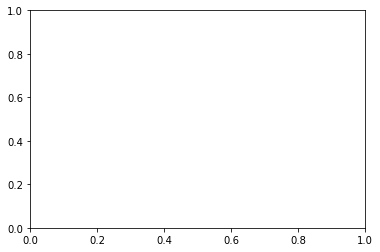

In [100]:
sns.kdeplot(x=Q1_clean['Price'], hue=Q1_clean['Neighbourhood '])
plt.show()

sns.kdeplot(x=Q1_clean['log_price'], hue=Q1_clean['Neighbourhood '])
plt.show()
#I don't understand why this doesn't work ... I have tried everything (even tried the normal solutions)

2.) Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [111]:
y = Q1_clean['Price']
x = pd.get_dummies(Q1_clean['Neighbourhood '], dtype='int')

In [112]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(x,y)

In [116]:
results = pd.DataFrame({'variable': x.columns, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


One thing that I noticed were that the regression coefficients were the same as the mean prices in part one. This is because we are only regressing on one variable with no controls.

3.) Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [187]:
y = Q1_clean['Price']
x = pd.get_dummies(Q1_clean['Neighbourhood '], dtype='int', drop_first=True)

In [188]:
reg = linear_model.LinearRegression(fit_intercept=True).fit(x,y)

In [198]:
#results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})
#results
#have spent a long time on this and can not get that to work, also what worked with x.columns previously no long
print(reg.coef_)
'''
This was all I could do to get the coefficients to print out... Obviously not optimal but I don;t know why it wasn't
working and this was the only way I could get the coefficients to show.
'''

[ 52.47088065 108.38778863  21.58073501  70.89016897]


In [125]:
print(reg.intercept_)

75.27649769585157


To get the new coefficients from the answers in part 2 you just subtract the intercept from the previous regression coeffecients.

4.) Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2
  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [128]:
y = Q1_clean['Price']
x = Q1_clean.loc[:,['Review Scores Rating', 'Neighbourhood '] ]

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

In [147]:
z_train = pd.concat([x_train['Review Scores Rating'], 
                     pd.get_dummies(x_train['Neighbourhood '], dtype='int')], axis = 1)
z_test = pd.concat([x_test['Review Scores Rating'], 
                    pd.get_dummies(x_test['Neighbourhood '], dtype='int')], axis = 1)

In [148]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(z_train,y_train)

In [149]:
y_hat = reg.predict(z_test)
print('Rsq: ', reg.score(z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


In [199]:
reg.fit(z_train,y_train)
#results = pd.DataFrame({'variable': x.columns, 'coefficient': reg.coef_})
#results
#again the other way didn't work so I tried the x.columns and it didn't work either... still not sure why
print(reg.coef_)

[  0.62691227 -31.866502    -8.46528163  34.84956649 -25.6770672
  31.15928434  79.21159104 -28.3048881  -50.90670294]


The most expensive property that you could buy would be an apartment in Manhattan with a 100 rating

5.) Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2
  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [153]:
y = Q1_clean['Price']
x = Q1_clean.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

In [163]:
z_train = pd.concat([x_train['Review Scores Rating'], 
                    pd.get_dummies(x_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(x_train['Room Type'], dtype='int')],
                    axis = 1)
z_test = pd.concat([x_test['Review Scores Rating'], 
                    pd.get_dummies(x_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(x_test['Room Type'], dtype='int')],
                    axis = 1)

In [164]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

In [171]:
y_hat = reg.predict(z_test)
print('Rsq: ', reg.score(z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

Rsq:  0.22035348129282328
RMSE:  114.27692123130632


In [200]:
#results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
#results
#again, anything I do doesn't fix it
print(reg.coef_)

[  0.62691227 -31.866502    -8.46528163  34.84956649 -25.6770672
  31.15928434  79.21159104 -28.3048881  -50.90670294]


In this case, Manhattan is still the neighbourhood with the highest prices, but the highest price is for an entire home/appartment.

6.) What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works

While I have been unable to see some of the coeffecients because of a problem with how the code works, I will make some assumptions based on basic multiple linear regression principles. I would assume that the two coefficients will change because the first regression coefficient does not control for the room type changing across different apartments. Therefore, when the variable is added into the multiple regression, I would guess that the coefficeint of Review Scores Rating will drop because the Room Type will have some predictive ability.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?